In [58]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.datasets import make_blobs

# Using Kmean ALgo

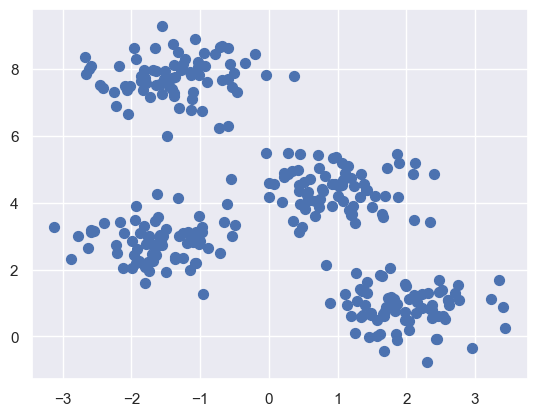

In [30]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [60]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=42,init="random")
kmeans.fit(scaled_features)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [63]:
y_kmeans = kmeans.predict(scaled_features)

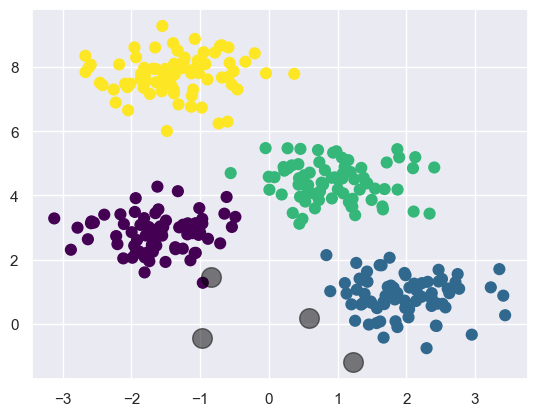

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [66]:
kmeans_kwargs = {"init": "random",
   "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

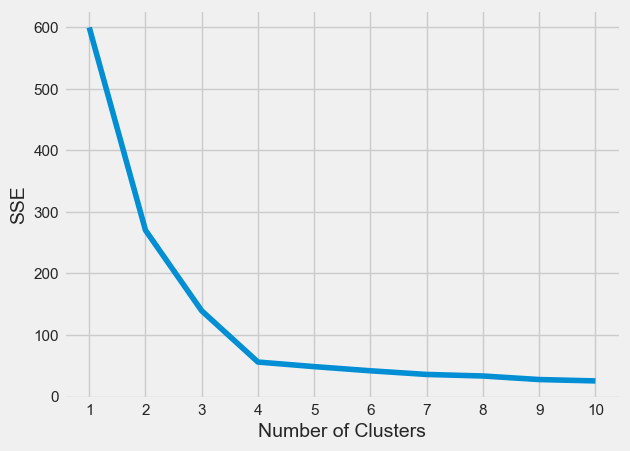

In [67]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [71]:
!pip install --upgrade kneed

In [72]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

In [73]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

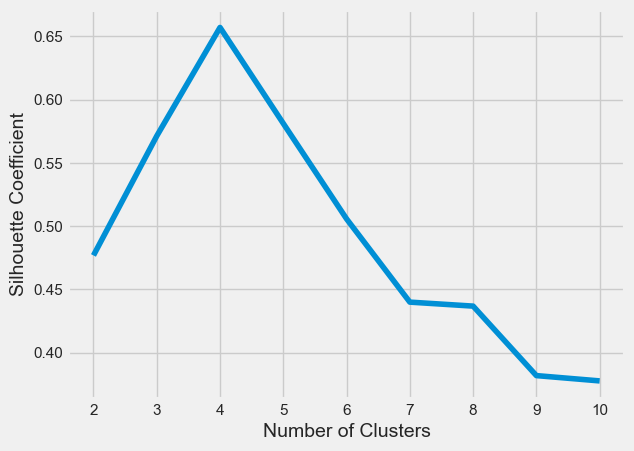

In [74]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Using Density Clusturing Algo (DBSCAN)

In [75]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [76]:
features, true_labels = make_moons(
 n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [78]:
#Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
kmeans_silhouette

0.5

In [80]:
dbscan_silhouette

0.38

In [81]:
#The silhouette coefficient is higher for the k-means algorithm. The DBSCAN algorithm appears to find more natural 
#clusters according to the shape of the data:

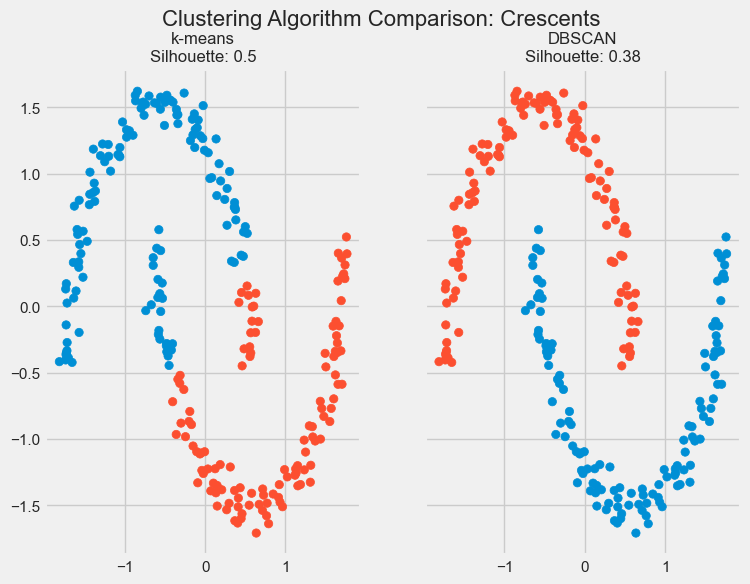

In [82]:
#Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [83]:
#This suggests that you need a better method to compare the performance of these two clustering algorithms.
#Hence we can use the scikit-learn implementation of a common metric called the adjusted rand index (ARI)

In [65]:
# from sklearn.metrics import pairwise_distances_argmin

# def find_clusters(X, n_clusters, rseed=2):
#     # 1. Randomly choose clusters
#     rng = np.random.RandomState(rseed)
#     i = rng.permutation(X.shape[0])[:n_clusters]
#     centers = X[i]
    
#     while True:
#         # 2a. Assign labels based on closest center
#         labels = pairwise_distances_argmin(X, centers)
        
#         # 2b. Find new centers from means of points
#         new_centers = np.array([X[labels == i].mean(0)
#                                 for i in range(n_clusters)])
        
#         # 2c. Check for convergence
#         if np.all(centers == new_centers):
#             break
#         centers = new_centers
    
#     return centers, labels

# centers, labels = find_clusters(X, 4)
# plt.scatter(X[:, 0], X[:, 1], c=labels,
#             s=50, cmap='viridis')

In [84]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [86]:
round(ari_kmeans, 2)

0.47

In [87]:
round(ari_dbscan, 2)

1.0

In [88]:
#The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, 
#and a score close to 1 indicates perfectly labeled clusters.Based on the above output, you can see that the silhouette coefficient
#was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.